Part 2,
     Neural network with one hidden layer with 4 neural unit. We will not be using any library such as Tensorflow. We are simply building a NN from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [37]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    #print("initial value")
    #print(W1.shape, b1.shape, W2.shape, b2.shape)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [4]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
    

In [5]:
def cost_function(A2, Y):
    m = Y.shape[1]
    J = (1 / (2 * m)) * np.sum(np.square(A2 - Y))
    return J

In [6]:
def back_prop(parameters, cache, X, Y):
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = (1 / m) * (A2 - Y)
    dW2 = np.dot(dZ2, A1.T)
    #print("inside back prop while calculating derivates")
    #print(A1.shape, Y.shape, dZ2.shape, dW2.shape)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), np.subtract(1, np.power(A1, 2)))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [7]:
def gradient_descent_update(parameters, grads,  learning_rate=0.3):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    #print("shape of dw2 is:" + str(dW2.shape))
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [38]:
def nn_model(X,Y, X_val, y_val, n_h,  epochs=2500, learning_rate=0.3, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    costs_train = []
    m_train = Y.shape[1]
    m_val = y_val.shape[1]
    for i in range(0, epochs):
        A2, cache = forward_prop(X, parameters)
        cost_train = cost_function(A2, Y)
        grads = back_prop(parameters, cache, X, Y)
        parameters = gradient_descent_update(parameters, grads, learning_rate)
        if i % 100 == 0:
            costs_train.append(cost_train)
            
            MAE_train = (1 / m_train) * np.sum(np.abs(A2 - Y))

            A2_val, cache = forward_prop(X_val, parameters)
            cost_val = cost_function(A2_val, y_val)
            MAE_val = (1 / m_val) * np.sum(np.abs(A2_val - y_val))

            print("epochs " + str(i) + '/' + str(epochs) + ': ')
            print('Training cost' + str(cost_train) + '| ' +
                  'validation cost' + str(cost_val))
            print('Training mae' + str(MAE_train) + '| ' +
                  'validation mae' + str(MAE_val))
        
    plt.plot(costs_train)
    plt.xlabel('Iterations X 100')
    plt.ylabel('Training cost')
    plt.title('Learning rate' + str(learning_rate))
    plt.show()

In [12]:
from sklearn.datasets import load_diabetes

In [13]:
diabetes = load_diabetes()
diabetes['feature_names']
diab = pd.DataFrame(diabetes['data'])
diab.columns = diabetes['feature_names']

In [14]:
X = diab

In [15]:
Y = diabetes['target']

In [16]:
X.shape

(442, 10)

In [17]:
Y.shape

(442,)

In [18]:
#split dataset into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=5)

In [19]:
X_train.shape

(296, 10)

In [20]:
X_train = X_train.T

In [21]:
X_train.shape

(10, 296)

In [22]:
y_train.shape

(296,)

In [23]:
y_train = np.array([y_train])

In [24]:
y_train.shape

(1, 296)

In [25]:
X_val.shape

(146, 10)

In [26]:
X_val = X_val.T

In [27]:
X_val.shape

(10, 146)

In [28]:
y_val = np.array([y_val])

In [29]:
y_val.shape

(1, 146)

In [30]:
layer_sizes(X_train, y_train)[0]

10

In [31]:
layer_sizes(X_train, y_train)[2]

1

In [32]:
layer_sizes(X,Y)

(442, 4, 442)

epochs 0/2500: 
Training cost14452.349487864132| validation cost8639.939627154201
Training mae152.33772916272588| validation mae105.33813898662655
epochs 100/2500: 
Training cost2115.7382828439677| validation cost2153.5594783636952
Training mae56.00358118831091| validation mae52.35665232972042
epochs 200/2500: 
Training cost1796.6309876295875| validation cost1816.8736857935978
Training mae50.52429363388802| validation mae47.9509330054594
epochs 300/2500: 
Training cost1645.0749036474244| validation cost1668.2777652436446
Training mae47.82591393586182| validation mae46.355681808321236
epochs 400/2500: 
Training cost1557.4172371534044| validation cost1591.1391892399868
Training mae46.355381925341405| validation mae45.819908200814545
epochs 500/2500: 
Training cost1495.4949242511059| validation cost1548.1769008754052
Training mae45.18771124815493| validation mae45.46258954542378
epochs 600/2500: 
Training cost1451.204993710466| validation cost1525.933527805479
Training mae44.2761146656833

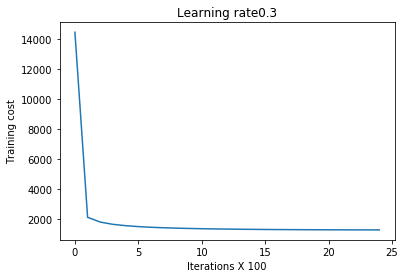

In [39]:
nn_model(X_train, y_train, X_val, y_val,4)
